In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset

In [2]:
X = np.linspace(0.0,10.0,1000000)
y = (0.5 * X) + 5 + np.random.randn(len(X))

data = pd.concat([
    pd.DataFrame(data=X,columns=['X']),
    pd.DataFrame(data=y,columns=['y'])],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
X    1000000 non-null float64
y    1000000 non-null float64
dtypes: float64(2)
memory usage: 15.3 MB


None

,X,y
0,0.00000,4.674631
1,0.00001,4.901244
2,0.00002,6.154795
3,0.00003,4.934960
4,0.00004,5.917939


,X,y
count,1000000.000000,1000000.000000
mean,5.000000,7.502236
std,2.886756,1.754887
min,0.000000,0.875946
25%,2.500000,6.195274
50%,5.000000,7.501882
75%,7.500000,8.807350
max,10.000000,14.216763


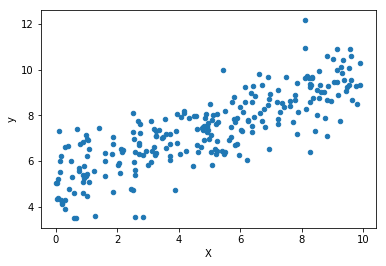

In [3]:
display(data.info())
display(data.head())
display(data.describe())
display(data \
    .sample(n=250) \
    .plot(kind='scatter',x='X',y='y'))

## Linear Regression

#### Model

In [4]:
import tensorflow as tf

# Random 10 points to grab
batch_size = 10

# Variables
m = tf.Variable(0.5)
b = tf.Variable(1.0)

# Placeholders
X_ph = tf.placeholder(
    tf.float32,
    [batch_size])
y_ph = tf.placeholder(
    tf.float32,
    [batch_size])

# Graph
y_pred = m*X_ph + b

# Loss function
error = tf.reduce_sum(
    tf.square(y_ph - y_pred))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [5]:
# Init global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Init variables
    sess.run(init)
    
    # Train
    epochs = 10000
    for i in range(epochs):
        # Select a random batch
        rand_ind = np.random.randint(
            len(X),
            size=batch_size)

        # train
        feed = {
            X_ph: X[rand_ind],
            y_ph: y[rand_ind]}
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [6]:
(model_m, model_b)

(0.5218691, 5.0650787)

#### Evaluate

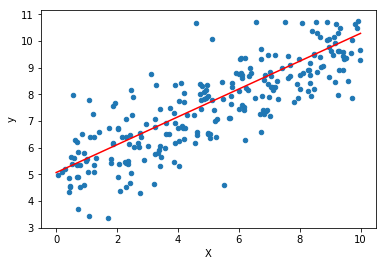

In [7]:
y_pred = X * model_m + model_b

data.sample(n=250).plot(kind='scatter',x='X',y='y')
plt.plot(X, y_pred,'r')

## Estimator API
- Steps:
    + Create Data Input Function
    + Define a list of features
    + Create the Estimator model
    + Train,Eval,Predict on the Estimator obj

#### Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X ,y,
    test_size=0.3, random_state = 101)

#### Define Train/Test Input Function

In [9]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':X_train}, y_train,
    batch_size=4,num_epochs=1000,shuffle=False)

test_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':X_test}, y_test,
    batch_size=4,num_epochs=1000,shuffle=False)

#### Define a list of features

In [10]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

#### Create the Estimator model: Linear Regression

In [11]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgi9fuc_u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10def0a518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train Estimator

In [12]:
estimator.train(
    input_fn=train_input_func,
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpgi9fuc_u/model.ckpt.
INFO:tensorflow:loss = 269.78336, step = 1
INFO:tensorflow:global_step/sec: 334.254
INFO:tensorflow:loss = 11.078083, step = 101 (0.301 sec)
INFO:tensorflow:global_step/sec: 815.441
INFO:tensorflow:loss = 9.345121, step = 201 (0.126 sec)
INFO:tensorflow:global_step/sec: 192.131
INFO:tensorflow:loss = 3.6170325, step = 301 (0.518 sec)
INFO:tensorflow:global_step/sec: 564.215
INFO:tensorflow:loss = 4.7803793, step = 401 (0.175 sec)
INFO:tensorflow:global_step/sec: 793.677
INFO:tensorflow:loss = 1.3683137, step = 501 (0.126 sec)
INFO:tensorflow:global_step/sec: 778.671
INFO:tensorflow:loss = 10.967637, step = 601 (0.129 sec)
INFO:tensorflow:global_step/sec: 758.752
INFO:tensorflow:l

#### Evaluate Train

In [13]:
train_metrics = estimator.evaluate(
    input_fn=train_input_func,
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-06-13:52:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgi9fuc_u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-06-13:52:41
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1287549, global_step = 1000, loss = 4.5150194
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpgi9fuc_u/model.ckpt-1000


In [14]:
print("train metrics: {}".format(train_metrics))

train metrics: {'average_loss': 1.1287549, 'loss': 4.5150194, 'global_step': 1000}


#### Evaluate Test

In [15]:
test_metrics = estimator.evaluate(
    input_fn=test_input_func,
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-06-13:52:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgi9fuc_u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-06-13:52:43
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1500126, global_step = 1000, loss = 4.6000504
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpgi9fuc_u/model.ckpt-1000


In [16]:
print("Test metrics: {}".format(test_metrics))

Test metrics: {'average_loss': 1.1500126, 'loss': 4.6000504, 'global_step': 1000}


#### Predictions

In [17]:
x = np.linspace(0,10,10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {'x': x},
    shuffle=False)

y_pred = []
for e in estimator.predict(input_fn=input_fn_predict):
    y_pred.append(e['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgi9fuc_u/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


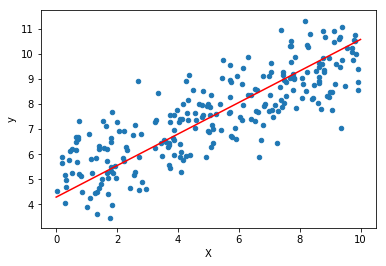

In [18]:
data.sample(n=250).plot(kind='scatter',x='X',y='y')
plt.plot(x , y_pred,'r')